# Importing required common libraries

In [206]:
## handling csv file and data
import numpy as np
import pandas as pd

## Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Labelencoding function
from sklearn.preprocessing import LabelEncoder

## Scaling function
from sklearn.preprocessing import MinMaxScaler

## SMOTE function(for oversampling of minor classes)
from imblearn.over_sampling import SMOTE

## Train-test split function and hyper parameter tuning function
from sklearn.model_selection import train_test_split,GridSearchCV

## Evaluation metrics functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,ConfusionMatrixDisplay

## For ignoring warnings(may not be necessary)
import warnings
warnings.filterwarnings('ignore')

In [207]:
## Required models from their respective libraries
from sklearn.naive_bayes import GaussianNB, CategoricalNB, ComplementNB, MultinomialNB, BernoulliNB

# Importing dataset and exploring it

In [208]:
## importing dataset
pred_or_sev = "sev"
dataset = pd.read_csv("heart-median.csv")
dataset.shape

(623, 14)

In [209]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


No of instances of each target class:
 0    222
1    158
2    108
3    107
4     28
Name: target, dtype: int64 

Plot of the above one:


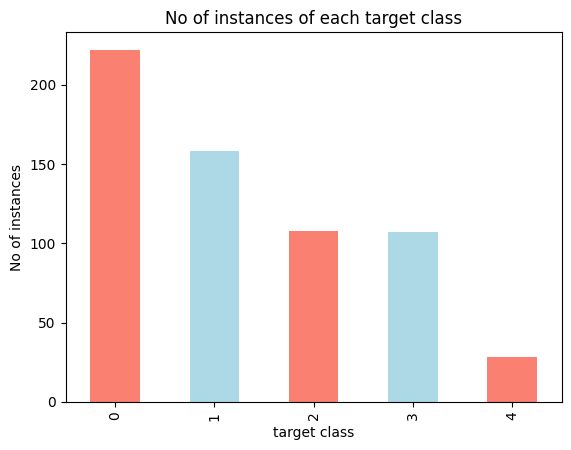

In [210]:
print("No of instances of each target class:\n",dataset["target"].value_counts(),"\n")
print("Plot of the above one:")
dataset["target"].value_counts().plot(kind='bar', color=["salmon","lightblue"])
plt.xlabel("target class")
plt.ylabel("No of instances")
plt.title("No of instances of each target class")
plt.show()

This dataset does not contain any null values but it contain some categorial values which should be converted into numerical values

In [211]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       623 non-null    int64  
 1   sex       623 non-null    int64  
 2   cp        623 non-null    int64  
 3   trestbps  623 non-null    int64  
 4   chol      623 non-null    int64  
 5   fbs       623 non-null    int64  
 6   restecg   623 non-null    int64  
 7   thalach   623 non-null    int64  
 8   exang     623 non-null    int64  
 9   oldpeak   623 non-null    float64
 10  slope     623 non-null    int64  
 11  ca        623 non-null    int64  
 12  thal      623 non-null    int64  
 13  target    623 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 68.3 KB


In [212]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,56.197432,0.818620,3.382022,131.747994,176.990369,0.187801,0.783307,137.051364,0.396469,1.013644,1.792937,0.335474,5.380417,1.295345
std,8.885726,0.385643,0.879453,18.824175,117.595469,0.390867,0.867182,25.885736,0.489557,1.087442,0.600494,0.740303,1.625184,1.239526
min,29.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,51.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,57.000000,1.000000,4.000000,130.000000,216.000000,0.000000,0.000000,140.000000,0.000000,0.900000,2.000000,0.000000,6.000000,1.000000
75%,62.000000,1.000000,4.000000,140.000000,258.000000,0.000000,2.000000,156.000000,1.000000,1.600000,2.000000,0.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In the covariance matrix below we are not getting some columns because they do not contain numerical values

In [213]:
#Make a correlation matrix
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.014220,0.065220,0.263303,0.031483,0.169376,0.096321,-0.335674,0.093591,0.191212,0.193278,0.154887,0.170359,0.236860
sex,0.014220,1.000000,0.100347,-0.044842,-0.242101,0.066358,-0.045605,-0.202634,0.143072,0.068783,0.143029,-0.084986,0.428356,0.256871
cp,0.065220,0.100347,1.000000,-0.003595,-0.148984,-0.017289,-0.040954,-0.327699,0.342201,0.149369,0.171336,0.037429,0.304227,0.357952
trestbps,0.263303,-0.044842,-0.003595,1.000000,0.086616,0.163549,0.130396,-0.075546,0.131061,0.150555,0.054543,0.054069,0.053168,0.138176
chol,0.031483,-0.242101,-0.148984,0.086616,1.000000,0.151003,0.259780,0.313334,-0.052603,0.106106,-0.102709,0.265970,-0.206066,-0.165746
fbs,0.169376,0.066358,-0.017289,0.163549,0.151003,1.000000,0.101282,-0.009853,-0.053662,0.008714,0.090596,0.026389,0.097418,0.071161
restecg,0.096321,-0.045605,-0.040954,0.130396,0.259780,0.101282,1.000000,0.085081,-0.020740,0.059060,0.003231,0.206078,-0.056632,0.023739
thalach,-0.335674,-0.202634,-0.327699,-0.075546,0.313334,-0.009853,0.085081,1.000000,-0.331589,-0.087701,-0.364521,0.057826,-0.322742,-0.385541
exang,0.093591,0.143072,0.342201,0.131061,-0.052603,-0.053662,-0.020740,-0.331589,1.000000,0.279134,0.246889,0.018357,0.272870,0.320712
oldpeak,0.191212,0.068783,0.149369,0.150555,0.106106,0.008714,0.059060,-0.087701,0.279134,1.000000,0.376101,0.199804,0.238494,0.378088


(14.5, -0.5)

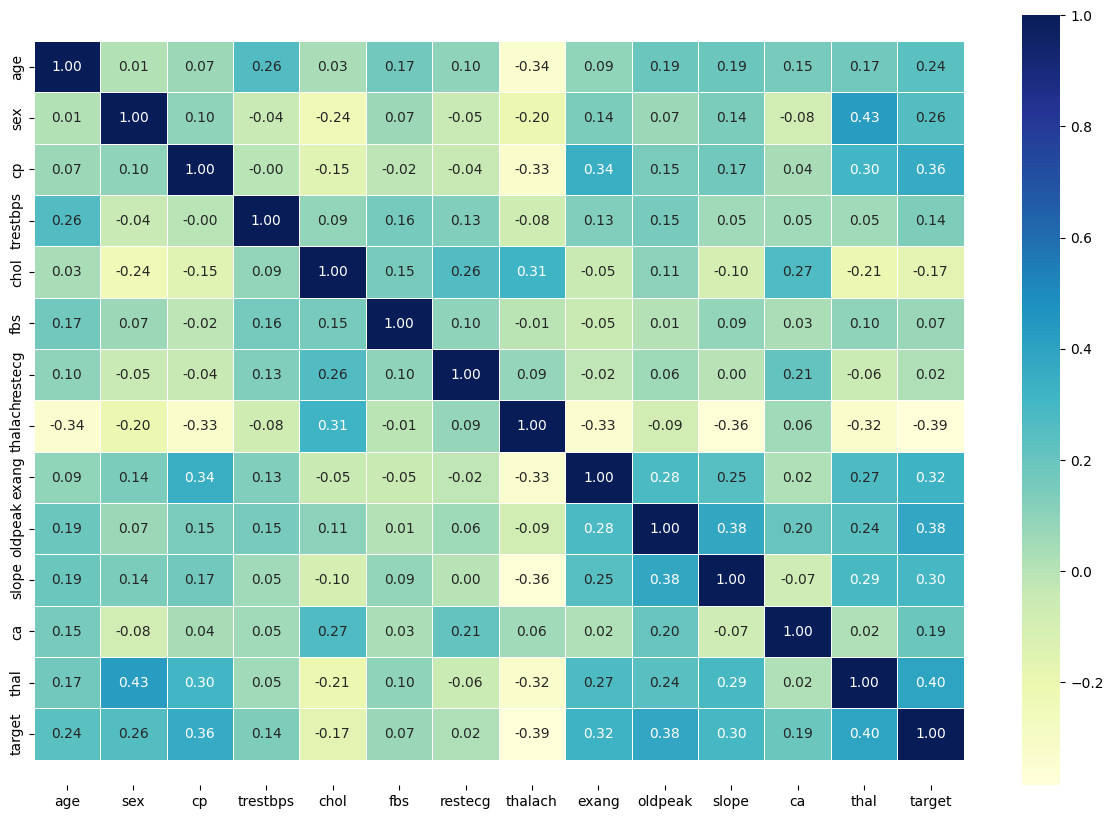

In [214]:
#Visualise correlation
corr_matrix = dataset.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

# Data preprocessing

In [215]:
predictors = dataset.drop("target",axis=1)
target = dataset["target"]
scaler = MinMaxScaler()
oversample = SMOTE()
predictors,target = oversample.fit_resample(predictors, target)

In [216]:
predictors_2,target_2 = oversample.fit_resample(predictors, target)
predictors_2 = scaler.fit_transform(predictors_2)
X_train, X_test,Y_train,Y_test = train_test_split(predictors_2,target_2,test_size=0.20,random_state=0)

In [217]:
models = [
  GaussianNB(),
  CategoricalNB(),
  ComplementNB(),
  MultinomialNB(),
  BernoulliNB()
]

model_names = [
    "Multinomial Naive Bayes",
    "Categorical Naive Bayes",
    "Complement Naive Bayes",
    "Gaussian Naive Bayes",
    "Bernoulli Naive Bayes"
]

Model: Multinomial Naive Bayes
                                                            
   a)The accuracy score achieved using Naive Bayes is: 36.94 %
   b)The precision score achieved using Naive Bayes is: 36.94 %
   c)The recall score achieved using Naive Bayes is: 36.94 %
   d)The f1 score achieved using Naive Bayes is: 36.94 %

                                                            
Confusion matrix


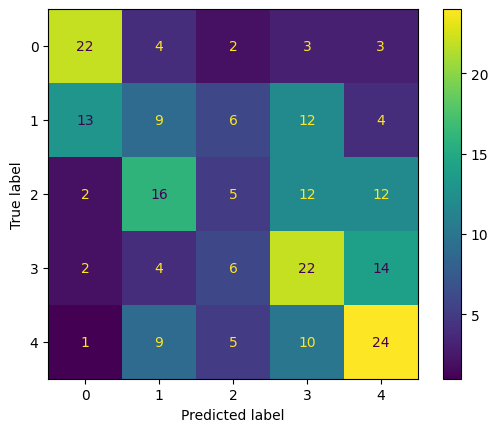

                                                            
Model: Categorical Naive Bayes
                                                            
   a)The accuracy score achieved using Naive Bayes is: 34.23 %
   b)The precision score achieved using Naive Bayes is: 34.23 %
   c)The recall score achieved using Naive Bayes is: 34.23 %
   d)The f1 score achieved using Naive Bayes is: 34.23 %

                                                            
Confusion matrix


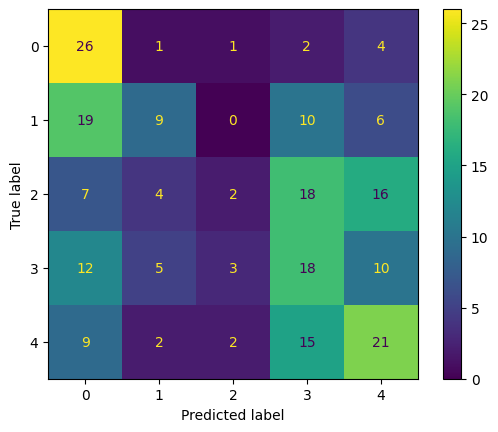

                                                            
Model: Complement Naive Bayes
                                                            
   a)The accuracy score achieved using Naive Bayes is: 27.03 %
   b)The precision score achieved using Naive Bayes is: 27.03 %
   c)The recall score achieved using Naive Bayes is: 27.03 %
   d)The f1 score achieved using Naive Bayes is: 27.03 %

                                                            
Confusion matrix


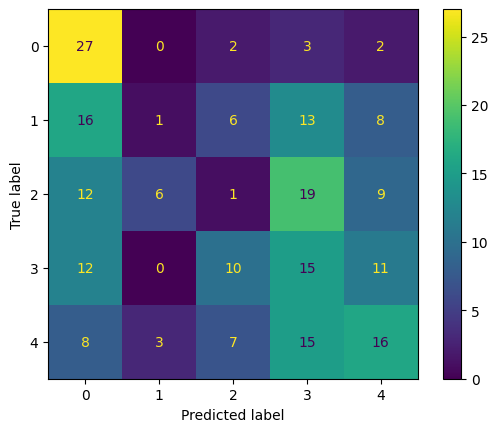

                                                            
Model: Gaussian Naive Bayes
                                                            
   a)The accuracy score achieved using Naive Bayes is: 31.08 %
   b)The precision score achieved using Naive Bayes is: 31.08 %
   c)The recall score achieved using Naive Bayes is: 31.08 %
   d)The f1 score achieved using Naive Bayes is: 31.08 %

                                                            
Confusion matrix


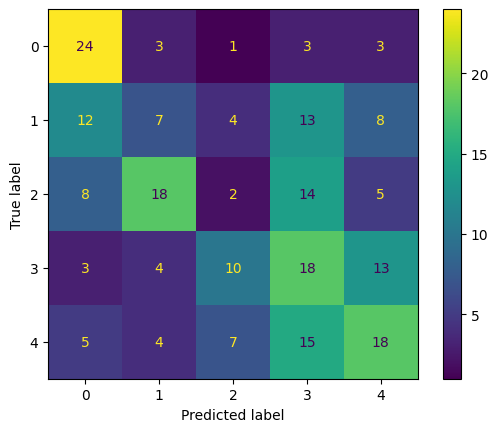

                                                            
Model: Bernoulli Naive Bayes
                                                            
   a)The accuracy score achieved using Naive Bayes is: 31.53 %
   b)The precision score achieved using Naive Bayes is: 31.53 %
   c)The recall score achieved using Naive Bayes is: 31.53 %
   d)The f1 score achieved using Naive Bayes is: 31.53 %

                                                            
Confusion matrix


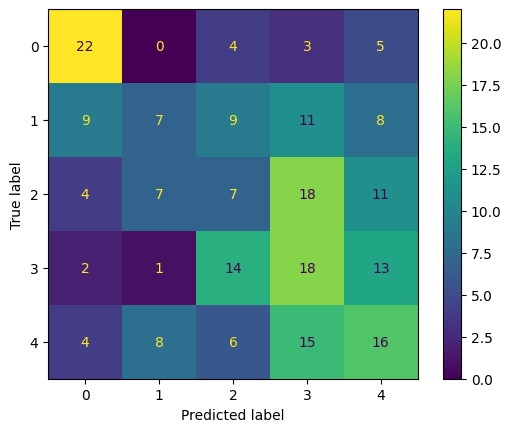

In [222]:
for model,model_name in zip(models, model_names):
  print("=="*30)
  print("Model:",model_name)
  print("  "*30)

  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  Y_test = np.array(Y_test)

  accuracy = round(accuracy_score(Y_test,Y_pred)*100,2)
  print("   a)The accuracy score achieved using Naive Bayes is: "+str(accuracy)+" %")

  precision = round(precision_score(Y_test,Y_pred,average='micro')*100,2)
  print("   b)The precision score achieved using Naive Bayes is: "+str(precision)+" %")

  recall= round(recall_score(Y_test,Y_pred,average='micro')*100,2)
  print("   c)The recall score achieved using Naive Bayes is: "+str(recall)+" %")

  f1 = round(f1_score(Y_test,Y_pred,average='micro')*100,2)
  print("   d)The f1 score achieved using Naive Bayes is: "+str(f1)+" %")
  print()

  print("  "*30)
  labels = [0,1]
  if pred_or_sev == "sev":
      labels = [0,1,2,3,4]

  print("Confusion matrix")

  c = confusion_matrix(Y_test, Y_pred)

  cm_display = ConfusionMatrixDisplay(confusion_matrix = c, display_labels = labels)

  cm_display.plot()
  plt.savefig("Confusion_matrix_"+ str(model_name)+".jpeg")
  plt.show()
  print("  "*30)